In [223]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#special matplotlib argument for improved plots
from matplotlib import rcParams

In [224]:
data = pd.read_csv(r'C:\Users\PB\Downloads\CarsNew.csv')
data = data.loc[data['Year'].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018])]

In [225]:
kmeans_data = data.fillna(0)
kmeans_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


In [226]:
kmeans_data.shape

(7337, 16)

In [227]:
kmeans_data.keys()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [228]:
columns = ['Model', 'Engine Fuel Type','Transmission Type', 'Driven_Wheels','Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style']

#remove white spaces in columns names:
kmeans_data.columns = kmeans_data.columns.str.strip()

#drop unwated columns:
kmeans_data.drop(columns, inplace=True, axis=1)
kmeans_data.head()


,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,BMW,2012,230.0,6.0,28,18,3916,31200
6,BMW,2012,300.0,6.0,26,17,3916,44100
7,BMW,2012,300.0,6.0,28,20,3916,39300
8,BMW,2012,230.0,6.0,28,18,3916,36900
9,BMW,2013,230.0,6.0,27,18,3916,37200


In [229]:
kmeans_data.Make = pd.Categorical(kmeans_data.Make)
kmeans_data['Make_code'] = kmeans_data.Make.cat.codes
kmeans_data.head(5)

,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Make_code
5,BMW,2012,230.0,6.0,28,18,3916,31200,4
6,BMW,2012,300.0,6.0,26,17,3916,44100,4
7,BMW,2012,300.0,6.0,28,20,3916,39300,4
8,BMW,2012,230.0,6.0,28,18,3916,36900,4
9,BMW,2013,230.0,6.0,27,18,3916,37200,4


In [230]:
kmeans_data.keys()
#kmeans_data.brand.cat.categories

Index(['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Make_code'],
      dtype='object')

In [231]:
col1 = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP']
selected = kmeans_data[col1]
selected.head(8)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200
6,2012,300.0,6.0,26,17,3916,44100
7,2012,300.0,6.0,28,20,3916,39300
8,2012,230.0,6.0,28,18,3916,36900
9,2013,230.0,6.0,27,18,3916,37200
10,2013,300.0,6.0,28,20,3916,39600
11,2013,230.0,6.0,28,19,3916,31500
12,2013,300.0,6.0,28,19,3916,44400


0
1
2
3
4
5
6
7
8


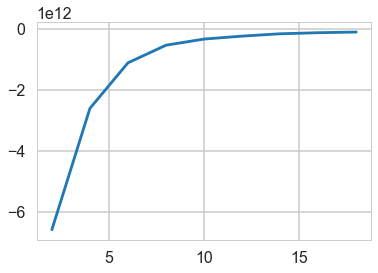

In [232]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(selected)
pl.plot(Nc,score)

In [233]:
    kmeans_model = KMeans(n_clusters=8)
    kmeans_model.fit(selected)
    kmeans_model = kmeans_model.fit(selected)
    print(kmeans_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [234]:
data_label = kmeans_model.predict(selected)
collections.Counter(data_label)

Counter({0: 3575, 7: 2518, 3: 754, 5: 61, 1: 150, 2: 29, 4: 249, 6: 1})

In [235]:
selected.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200


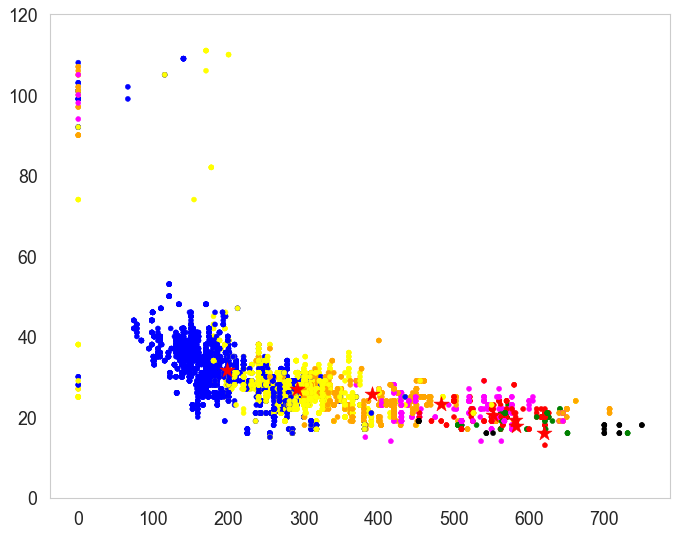

In [236]:
#HP Vs HighwayMPG

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green', 'brown', 'yellow']
plt.scatter(selected.iloc[:, 1], selected.iloc[:, 3], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,3],s=200,marker='*',c='red',label='centroids')
plt.ylim(0,120)
# plt.xlim(0,1)
plt.grid()
plt.show()

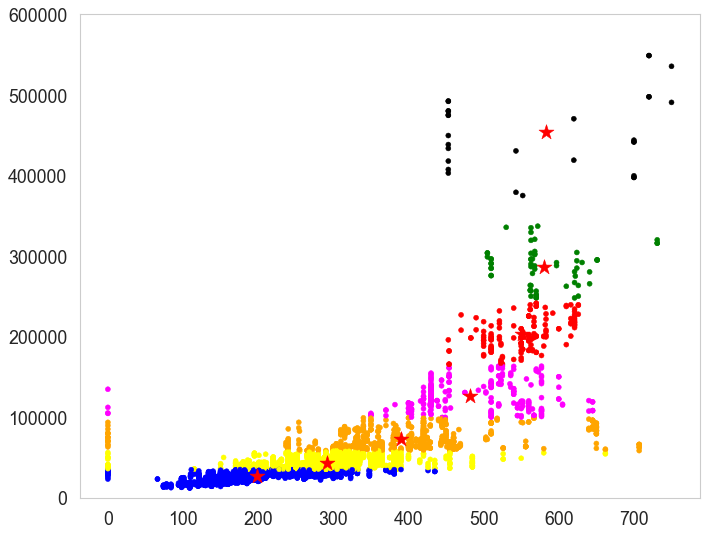

In [237]:
#HP VS Price


from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green', 'brown', 'yellow']
plt.scatter(selected.iloc[:, 1], selected.iloc[:, 6], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,6],s=200,marker='*',c='red',label='centroids')
plt.ylim(0,600000)
# plt.xlim(0,1)
plt.grid()
plt.show()

In [238]:
print(selected.describe())

              Year    Engine HP  Engine Cylinders  highway MPG     city mpg  \
count  7337.000000  7337.000000       7337.000000  7337.000000  7337.000000   
mean   2015.410386   271.443233          5.497070    28.691291    21.371950   
std       1.337801   115.553031          1.842126    10.042316    10.681801   
min    2012.000000     0.000000          0.000000    13.000000    10.000000   
25%    2015.000000   184.000000          4.000000    23.000000    17.000000   
50%    2016.000000   265.000000          6.000000    28.000000    20.000000   
75%    2016.000000   325.000000          6.000000    32.000000    24.000000   
max    2017.000000   750.000000         12.000000   354.000000   137.000000   

        Popularity          MSRP  
count  7337.000000  7.337000e+03  
mean   1658.652174  4.795848e+04  
std    1406.815037  4.935602e+04  
min      21.000000  1.199000e+04  
25%     617.000000  2.669500e+04  
50%    1385.000000  3.531500e+04  
75%    2031.000000  4.830000e+04  
max    5

In [239]:
selected.head(1)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200


In [240]:
col2 = ['Engine HP','MSRP']
df2 = selected[col2]
df2.head(8)

,Engine HP,MSRP
5,230.0,31200
6,300.0,44100
7,300.0,39300
8,230.0,36900
9,230.0,37200
10,300.0,39600
11,230.0,31500
12,300.0,44400


In [241]:
#Split training and testing data:
#Y = Car Price
#X = Engine HP
import sklearn.cross_validation
sklearn.model_selection.train_test_split
X = df2.drop('MSRP', axis = 1)
Y = df2['MSRP']
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4915, 1)
(2422, 1)
(4915,)
(2422,)


In [242]:
#Linear Regression:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
print(Y_pred)

[24655.81241344 18915.85566672 47615.63940034 ... 30395.76916017
 57660.56370711 72010.45557392]


<Figure size 800x640 with 0 Axes>

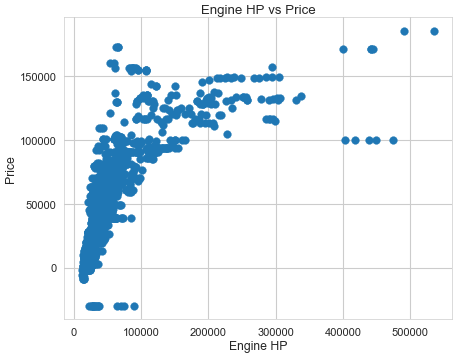

In [243]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=50, facecolor='w', edgecolor='k')
plt.scatter(Y_test, Y_pred)
plt.xlabel("Engine HP")
plt.ylabel("Price")
plt.title("Engine HP vs Price");

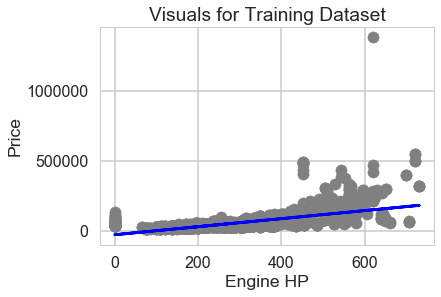

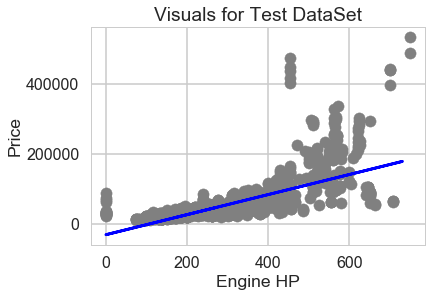

In [244]:
#Visualizing the training Test Results 
plt.scatter(X_train, Y_train, color= 'gray')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Engine HP")
plt.ylabel("Price")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, Y_test, color= 'gray')
plt.plot(X_train, lm.predict(X_train), color = 'blue')
plt.title("Visuals for Test DataSet")
plt.xlabel("Engine HP")
plt.ylabel("Price")
plt.show()

C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


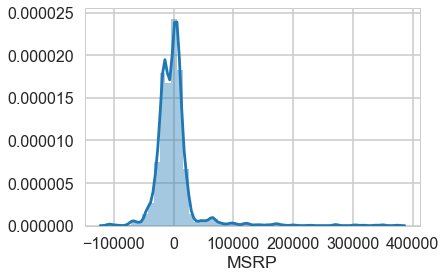

In [245]:
#This plot gives us data for Engine HP Vs Price
sns.distplot((Y_test-Y_pred))

In [246]:
from sklearn import metrics
import numpy as np
lm.score(X_test, Y_test)
print('LR score:', lm.score(X_test, Y_test))
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

LR score: 0.5051254532513225
MAE: 18376.69949728164
MSE: 1169523521.9198086
RMSE: 34198.29706169313


In [247]:
import statsmodels.api as sm    
model = sm.OLS(Y_test, Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     7388.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:54:28   Log-Likelihood:                -28722.
No. Observations:                2422   AIC:                         5.745e+04
Df Residuals:                    2421   BIC:                         5.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0068      0.012     85.952      0.000       0.984       1.030
==============================================================================
Omnibus:                     2332.718   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           137842.053
Skew:                           4.520   Prob(JB):                         0.00
Kurtosis:                      38.835   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(4915, 1)
(2422, 1)
(4915,)
(2422,)
[49581.48928071 44139.68889656 51758.20943437 ... 41962.9687429
 53934.92958803 55023.28966486]


<Figure size 800x640 with 0 Axes>

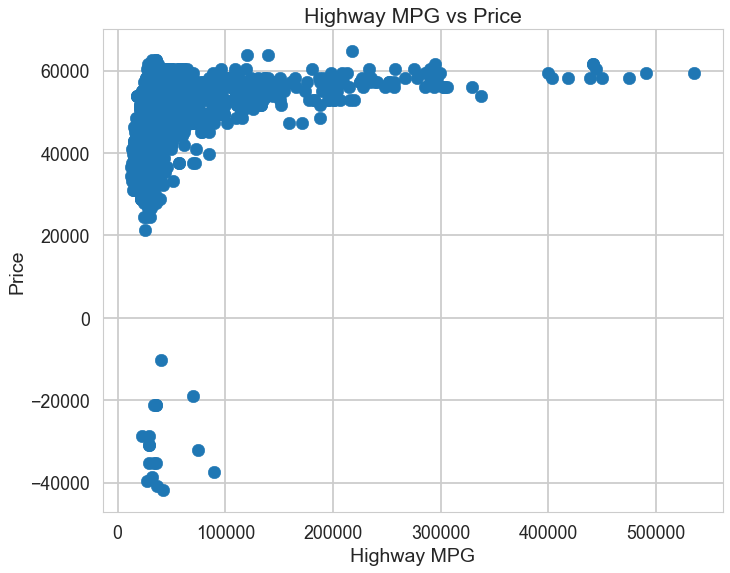

In [252]:
# LR : Highway MPG Vs Price

col4 = ['highway MPG','MSRP']
df4 = kmeans_data[col4]
df4.head(8)

import sklearn.cross_validation
sklearn.model_selection.train_test_split

X = df4.drop('MSRP', axis = 1)
Y = df4['MSRP']


X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print(Y_pred)

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(Y_test, Y_pred)
plt.xlabel("Highway MPG")
plt.ylabel("Price")
plt.title("Highway MPG vs Price");

LR score: 0.07824139308412481
MAE: 24266.48304423891
MSE: 2178366980.8898525
RMSE: 46672.97913021894


C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


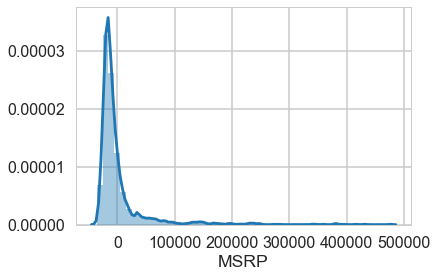

In [254]:
#Highway MPG Vs Price

from sklearn import metrics
import numpy as np
lm.score(X_test, Y_test)
print('LR score:', lm.score(X_test, Y_test))
print('MAE:', metrics.mean_absolute_error(Y_test,Y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.distplot((Y_test-Y_pred))

In [255]:
#Highway mpg Vs Price

import statsmodels.api as sm    
model = sm.OLS(Y_test, Y_pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     2850.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        11:56:11   Log-Likelihood:                -29474.
No. Observations:                2422   AIC:                         5.895e+04
Df Residuals:                    2421   BIC:                         5.896e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0323      0.019     53.390      0.000       0.994       1.070
==============================================================================
Omnibus:                     2326.523   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91916.325
Skew:                           4.687   Prob(JB):                         0.00
Kurtosis:                      31.687   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [263]:
# #LR : Popularity Vs Price

# col3 = ['Popularity','MSRP']
# df3 = kmeans_data[col3]

# import sklearn.cross_validation
# sklearn.model_selection.train_test_split

# X = df3.drop('MSRP', axis = 1)
# Y = df3['MSRP']


# X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
# print(X_train.shape)
# print(X_test.shape)
# print(Y_train.shape)
# print(Y_test.shape)

# from matplotlib.pyplot import figure

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
# from sklearn.linear_model import LinearRegression

# lm = LinearRegression()
# lm.fit(X_train, Y_train)

# Y_pred = lm.predict(X_test)
# print(Y_pred)

# from matplotlib.pyplot import figure

# figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

# plt.scatter(Y_test, Y_pred)
# plt.xlabel("Popularity")
# plt.ylabel("Price")
# plt.title("Popularity vs Price");
# plt.xlim(1,100000)